In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet

# Load dataset
df = pd.read_csv("ebay_cleaned.csv")

In [3]:
# Convert date column to datetime
df['Item Creation Date'] = pd.to_datetime(df['Item Creation Date'])
df = df.sort_values('Item Creation Date')

In [12]:
# Aggregate sales data by date (assuming each row is a sale)
daily_sales = df.groupby(df['Item Creation Date'].dt.date).size().reset_index(name='Sales')
daily_sales['Item Creation Date'] = pd.to_datetime(daily_sales['Item Creation Date'])
daily_sales.set_index('Item Creation Date', inplace=True)

In [13]:
# Prophet Model
prophet_df = daily_sales.reset_index().rename(columns={'Item Creation Date': 'ds', 'Sales': 'y'})
prophet_model = Prophet()
prophet_model.fit(prophet_df)
future = prophet_model.make_future_dataframe(periods=7)
forecast = prophet_model.predict(future)

20:09:29 - cmdstanpy - INFO - Chain [1] start processing
20:09:29 - cmdstanpy - INFO - Chain [1] done processing


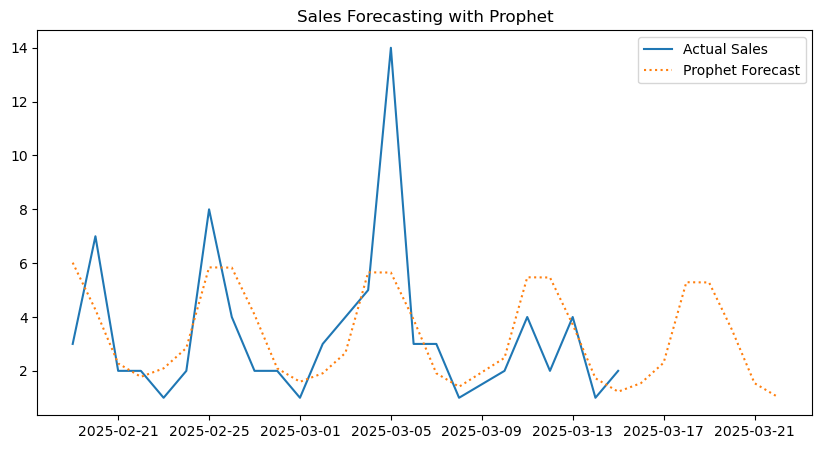

In [15]:
# Plot results
plt.figure(figsize=(10,5))
plt.plot(daily_sales.index, daily_sales['Sales'], label='Actual Sales')
plt.plot(forecast['ds'], forecast['yhat'], label='Prophet Forecast', linestyle='dotted')
plt.legend()
plt.title('Sales Forecasting with Prophet')
plt.show()